In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rcParams.update({'font.size':18})

In [17]:
simulation_data = np.genfromtxt('../../../csv/test.csv', delimiter=',')
y = np.zeros((4,len(simulation_data)))
for i in range(len(simulation_data)):
    y[0,i] = simulation_data[i,0]
    y[1,i] = simulation_data[i,1]
    y[2,i] = simulation_data[i,2]
    y[3,i] = simulation_data[i,3]

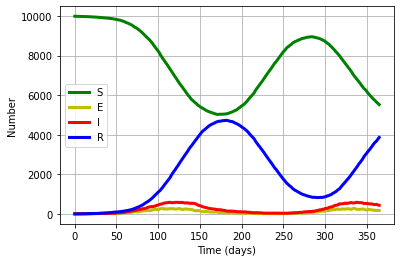

In [18]:
labels = ['S', 'E', 'I', 'R']
colours = ['g', 'y', 'r', 'b']
plt.Figure(figsize=(10,7))
for i in range(4):
    plt.plot(y[i], label = labels[i], linewidth = 3, c = colours[i])
# plt.plot(simulation_data,label =['S', 'E', 'I', 'R'], linewidth = 3, col = ['g', 'y', 'r', 'b'])
# plt.xlim([0,100])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
plt.savefig('../../../figures/random_graph_model_figs/SIR_random_graph.png', bbox_inches = 'tight')
plt.show()

In [4]:
with open('../../../csv/BA_results_infections_SIRS_0.01.json', 'r') as file:
    infections = json.load(file)
# print(infections)

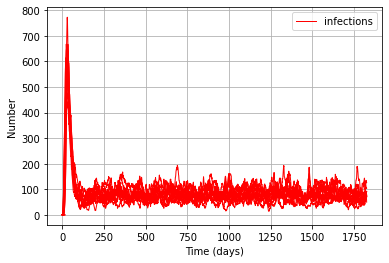

In [5]:
plt.Figure(figsize=(10,7))
for i in range(len(infections['infections'])-1):
    plt.plot(infections['infections'][i],'r', linewidth = 1)
plt.plot(infections['infections'][i],'r', linewidth = 1, label = 'infections')
# plt.xlim([0,100])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
plt.savefig('../../../figures/random_graph_model_figs/infections_random_graph_0.02_SIRS.png', bbox_inches = 'tight')
plt.show()
# 35 seconds

# Degree Distribution from SBM  

In [6]:
with open('../../../json/SBM_network.json', 'r') as file:
    network = json.load(file)

In [7]:
np.mean(network['network_struct']['degrees'])

6.38616

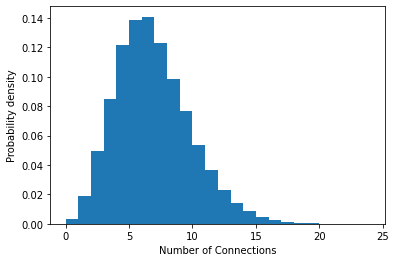

In [8]:
n = np.max(network['network_struct']['degrees'])
plt.hist(network['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM')
plt.show()

With weighted nodes

In [9]:
with open('../../../json/SBM_network_weight.json', 'r') as file:
    network = json.load(file)

In [10]:
np.mean(network['network_struct']['degrees'])

4.9089

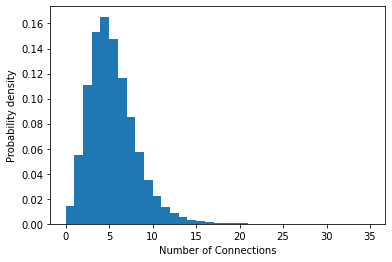

In [11]:
n = np.max(network['network_struct']['degrees'])
plt.hist(network['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM')
plt.show()

In [22]:
simulation_data = np.genfromtxt('../../../csv/test2.csv', delimiter=',')

(array([0.38136456, 0.35641548, 0.18049898, 0.05880855, 0.02291242]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

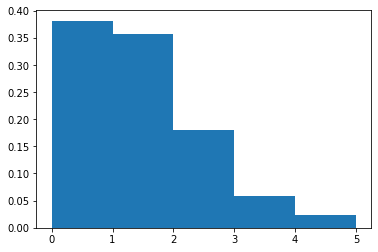

In [23]:
plt.hist(simulation_data, bins=list(range(0,int(max(simulation_data)))), density=True)

In [14]:
needed = [18,15,9,11]
result = []
for n in range(18,sum(needed)):
    napkins = [n,0,0]
    cost = 0
    cost += n * 0.24
    for i in range(3):
        # use napkins
        napkins[0] -= needed[i]
        napkins[-1] += needed[i]
        # cleaning stages
        napkins[0] += napkins[1]
        napkins[1] = 0
        # check if fast cleaning required
        if napkins[0] < needed[i+1]:
            fast = needed[i+1] - napkins[0]
            cost += fast * 0.12
            napkins[0] += fast
            napkins[-1] -= fast
        # check if slow cleaning required
        if i != 2 and napkins[0] + napkins[1] < sum(needed[i+1:]):
            # slow napkins is the minimum of all remaining and total available
            slow = min(sum(needed[i+1:]) - (napkins[0] + napkins[1]), napkins[-1])
            cost += slow * 0.07
            napkins[1] += slow
            napkins[-1] -= slow
        print(i, cost, napkins)
    result.append(cost)

0 6.33 [15, 3, 0]
1 7.68 [9, 9, 0]
2 7.92 [11, 0, 7]
0 6.52 [15, 4, 0]
1 7.819999999999999 [9, 10, 0]
2 7.9399999999999995 [11, 0, 8]
0 6.709999999999999 [15, 5, 0]
1 7.959999999999999 [9, 11, 0]
2 7.959999999999999 [11, 0, 9]
0 6.9 [15, 6, 0]
1 8.030000000000001 [9, 11, 1]
2 8.030000000000001 [11, 0, 10]
0 7.09 [15, 7, 0]
1 8.1 [9, 11, 2]
2 8.1 [11, 0, 11]
0 7.279999999999999 [15, 8, 0]
1 8.17 [9, 11, 3]
2 8.17 [11, 0, 12]
0 7.47 [15, 9, 0]
1 8.24 [9, 11, 4]
2 8.24 [11, 0, 13]
0 7.66 [15, 10, 0]
1 8.36 [10, 10, 5]
2 8.36 [11, 0, 14]
0 7.85 [15, 11, 0]
1 8.48 [11, 9, 6]
2 8.48 [11, 0, 15]
0 8.04 [15, 12, 0]
1 8.6 [12, 8, 7]
2 8.6 [11, 0, 16]
0 8.23 [15, 13, 0]
1 8.72 [13, 7, 8]
2 8.72 [11, 0, 17]
0 8.42 [15, 14, 0]
1 8.84 [14, 6, 9]
2 8.84 [11, 0, 18]
0 8.61 [15, 15, 0]
1 8.959999999999999 [15, 5, 10]
2 8.959999999999999 [11, 0, 19]
0 8.8 [15, 16, 0]
1 9.08 [16, 4, 11]
2 9.08 [11, 0, 20]
0 8.99 [15, 17, 0]
1 9.200000000000001 [17, 3, 12]
2 9.200000000000001 [11, 0, 21]
0 9.18 [15, 18, 

In [15]:
print(result)

[7.92, 7.9399999999999995, 7.959999999999999, 8.030000000000001, 8.1, 8.17, 8.24, 8.36, 8.48, 8.6, 8.72, 8.84, 8.959999999999999, 9.08, 9.200000000000001, 9.32, 9.49, 9.66, 9.83, 10.0, 10.17, 10.34, 10.51, 10.68, 10.85, 11.02, 11.19, 11.36, 11.53, 11.7, 11.87, 12.04, 12.21, 12.38, 12.55]
